In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Leer CSV limpio ---
df = pd.read_csv("resultados_energia_limpio.csv")
df

,timestamp,script,iteracion,tiempo_s,energia_j
0,2025-09-15T13:20:52-05:00,64_Frank_lu.jl,1,1.885828,121.243073
1,2025-09-15T13:20:54-05:00,64_Frank_lu.jl,2,1.838194,125.408141
2,2025-09-15T13:20:56-05:00,64_Frank_lu.jl,3,1.837473,125.525964
3,2025-09-15T13:20:58-05:00,64_Frank_lu.jl,4,1.842617,126.186574
4,2025-09-15T13:21:00-05:00,64_Frank_lu.jl,5,1.840102,126.306349
...,...,...,...,...,...
1495,2025-09-15T14:06:57-05:00,32_64_Frank_lur_refinado.jl,496,2.416420,160.156283
1496,2025-09-15T14:06:59-05:00,32_64_Frank_lur_refinado.jl,497,2.424260,160.925241
1497,2025-09-15T14:07:02-05:00,32_64_Frank_lur_refinado.jl,498,2.430765,160.938256
1498,2025-09-15T14:07:04-05:00,32_64_Frank_lur_refinado.jl,499,2.415123,160.308101


In [60]:

# Renombrar columnas si vienen con nombres largos
df = df.rename(columns={
    "tiempo_s(segundos)": "tiempo_s",
    "energia_j(julios)": "energia_j"
})


In [61]:
df

,timestamp,script,iteracion,tiempo_s,energia_j
0,2025-09-15T13:20:52-05:00,64_Frank_lu.jl,1,1.885828,121.243073
1,2025-09-15T13:20:54-05:00,64_Frank_lu.jl,2,1.838194,125.408141
2,2025-09-15T13:20:56-05:00,64_Frank_lu.jl,3,1.837473,125.525964
3,2025-09-15T13:20:58-05:00,64_Frank_lu.jl,4,1.842617,126.186574
4,2025-09-15T13:21:00-05:00,64_Frank_lu.jl,5,1.840102,126.306349
...,...,...,...,...,...
1495,2025-09-15T14:06:57-05:00,32_64_Frank_lur_refinado.jl,496,2.416420,160.156283
1496,2025-09-15T14:06:59-05:00,32_64_Frank_lur_refinado.jl,497,2.424260,160.925241
1497,2025-09-15T14:07:02-05:00,32_64_Frank_lur_refinado.jl,498,2.430765,160.938256
1498,2025-09-15T14:07:04-05:00,32_64_Frank_lur_refinado.jl,499,2.415123,160.308101


In [62]:

# Filtrar scripts de interés
scripts_filtrados = [  "64_Frank_lu.jl"
  ,"32_Frank_lu.jl",
  "32_64_Frank_lur_refinado.jl"]
df = df[df["script"].isin(scripts_filtrados)].dropna(subset=["tiempo_s","energia_j"])
df

,timestamp,script,iteracion,tiempo_s,energia_j
0,2025-09-15T13:20:52-05:00,64_Frank_lu.jl,1,1.885828,121.243073
1,2025-09-15T13:20:54-05:00,64_Frank_lu.jl,2,1.838194,125.408141
2,2025-09-15T13:20:56-05:00,64_Frank_lu.jl,3,1.837473,125.525964
3,2025-09-15T13:20:58-05:00,64_Frank_lu.jl,4,1.842617,126.186574
4,2025-09-15T13:21:00-05:00,64_Frank_lu.jl,5,1.840102,126.306349
...,...,...,...,...,...
1495,2025-09-15T14:06:57-05:00,32_64_Frank_lur_refinado.jl,496,2.416420,160.156283
1496,2025-09-15T14:06:59-05:00,32_64_Frank_lur_refinado.jl,497,2.424260,160.925241
1497,2025-09-15T14:07:02-05:00,32_64_Frank_lur_refinado.jl,498,2.430765,160.938256
1498,2025-09-15T14:07:04-05:00,32_64_Frank_lur_refinado.jl,499,2.415123,160.308101


                        script  tiempo_promedio  tiempo_std  energia_promedio  \
0               32_Frank_lu.jl         1.270499    0.006857         83.749030   
1               64_Frank_lu.jl         1.847449    0.007425        126.718533   
2  32_64_Frank_lur_refinado.jl         2.424487    0.007235        160.761757   

   energia_std            label  
0     0.557586          32 bits  
1     0.629434          64 bits  
2     0.602788  Mixed precision  


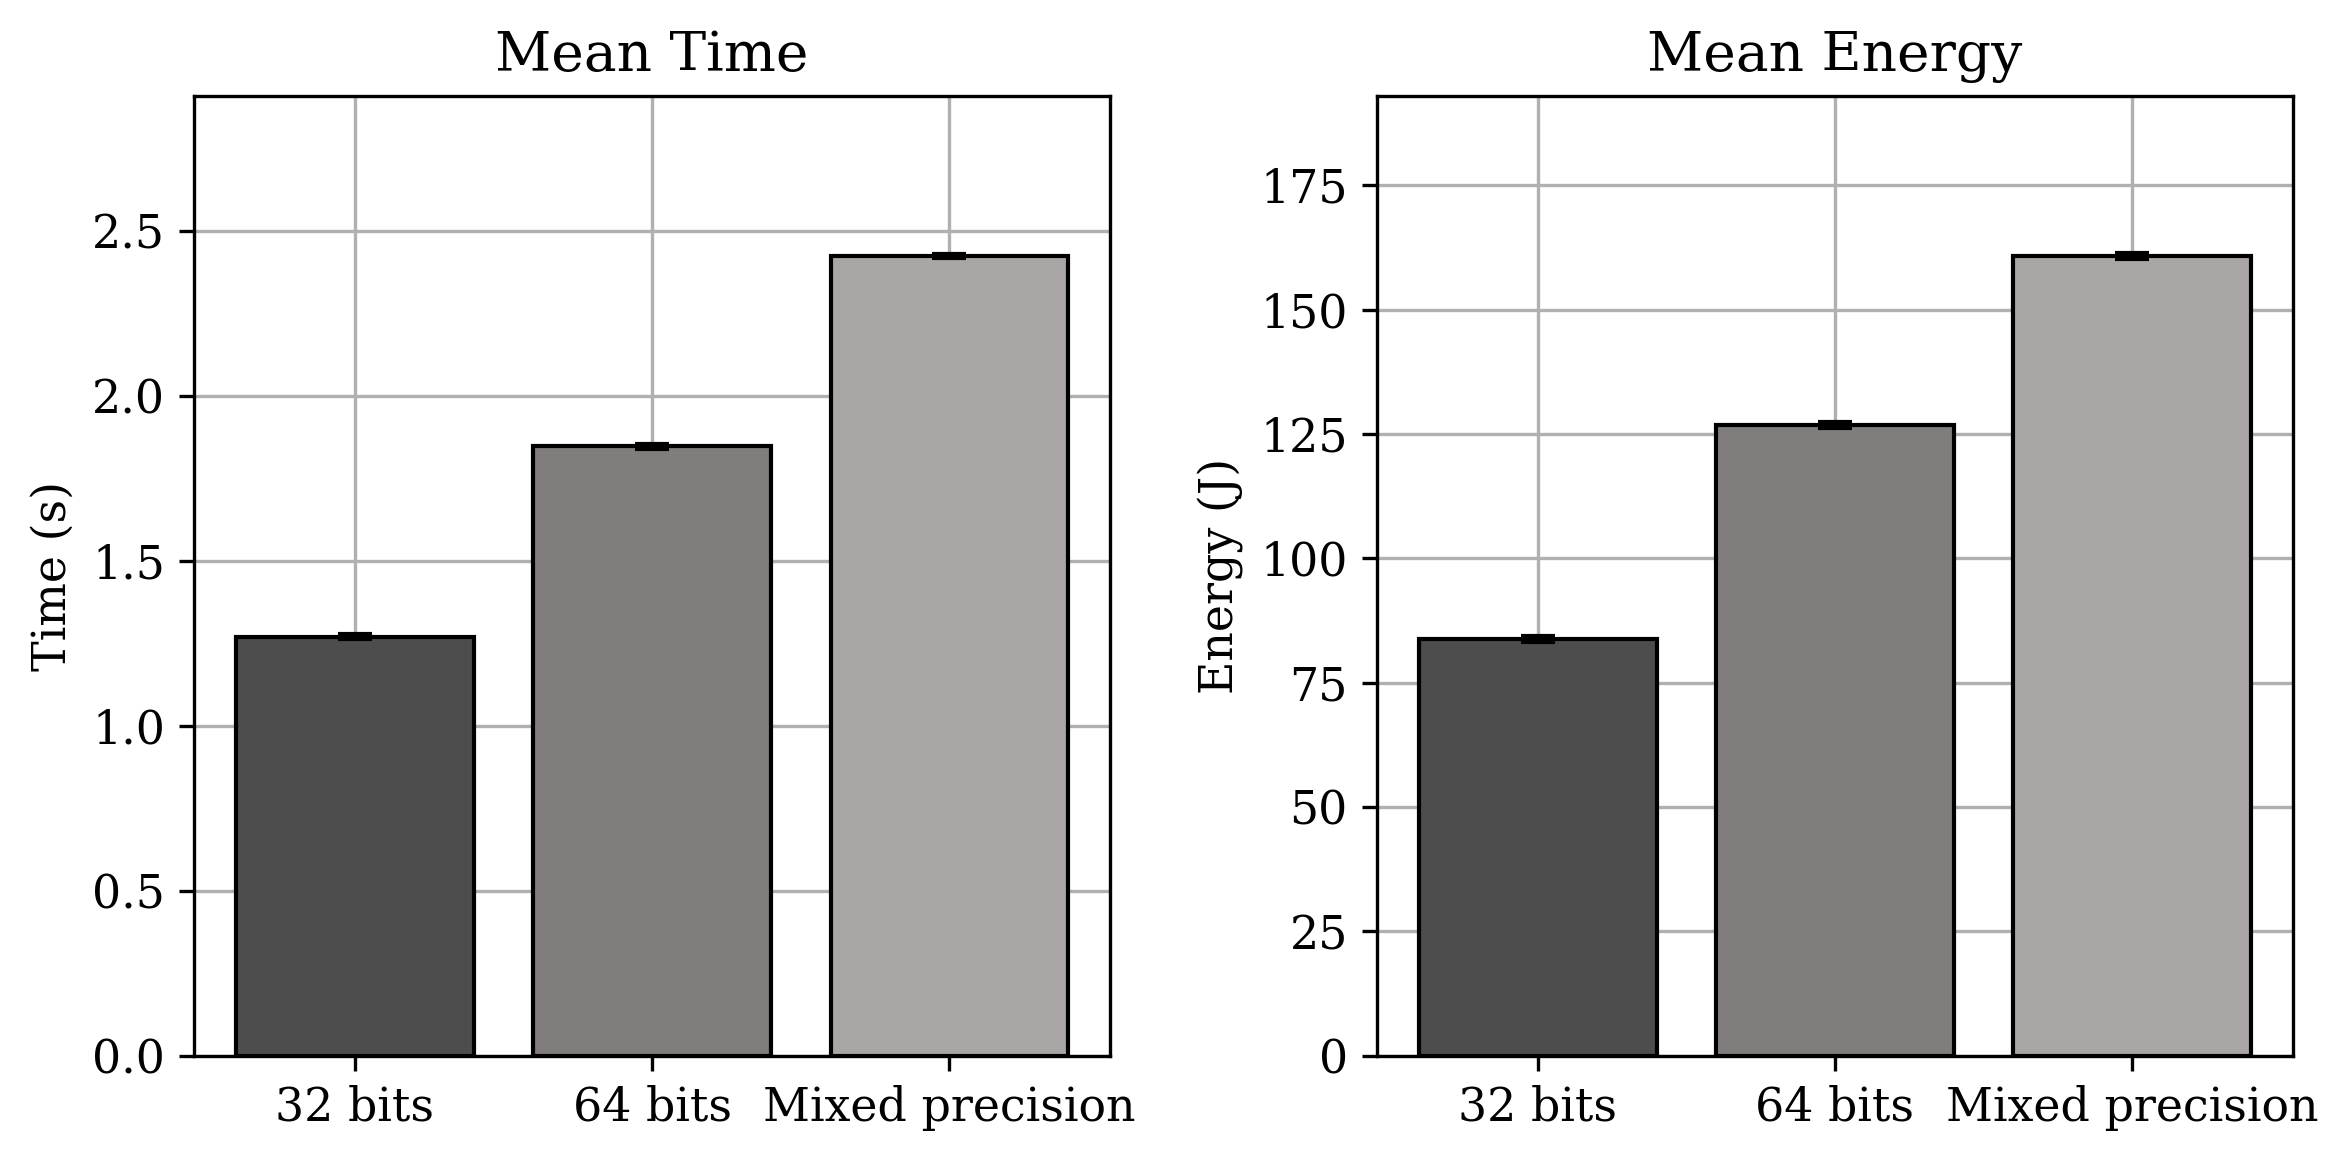

In [63]:
# Quitar outliers (IQR)
def remove_outliers_iqr(df, columnas):
    df_clean = df.copy()
    for col in columnas:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_clean = remove_outliers_iqr(df, ["tiempo_s", "energia_j"])

# Estadísticas: media y desviación estándar
df_stats = df_clean.groupby("script")[["tiempo_s", "energia_j"]].agg(['mean', 'std']).reset_index()
df_stats.columns = ['script', 'tiempo_promedio', 'tiempo_std', 'energia_promedio', 'energia_std']

label_map = {
    "32_Frank_lu.jl": "32 bits",
    "64_Frank_lu.jl": "64 bits",
    "32_64_Frank_lur_refinado.jl": "Mixed precision"
}
df_stats['label'] = df_stats['script'].map(label_map).fillna(df_stats['script'])

# Orden deseado
desired_order = [s for s in ["32_Frank_lu.jl","64_Frank_lu.jl","32_64_Frank_lur_refinado.jl"] if s in df_stats['script'].values]
if desired_order:
    df_stats = df_stats.set_index('script').loc[desired_order].reset_index()
    df_stats['label'] = df_stats['script'].map(label_map).fillna(df_stats['script'])

print(df_stats)

# --- Plot (labels vienen del dataframe, así no hay desajuste) ---
plt.rcParams.update({"font.family": "serif", "font.size": 11})
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
colors = ["#4d4d4d", "#817d7d",  "#aaa6a6"]

# Activar grilla detrás de las barras
for ax in axes:
    ax.grid(True)               # activar grilla
    ax.set_axisbelow(True)      # que la grilla quede detrás de las barras

# --- Tiempo promedio ---
axes[0].bar(
    df_stats["label"], df_stats["tiempo_promedio"],
    yerr=df_stats["tiempo_std"], color=colors[:len(df_stats)],
    capsize=4, edgecolor="black"
)
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Mean Time")
if df_stats["tiempo_promedio"].notna().any():
    axes[0].set_ylim(0, df_stats["tiempo_promedio"].max() * 1.2)

# --- Energía promedio ---
axes[1].bar(
    df_stats["label"], df_stats["energia_promedio"],
    yerr=df_stats["energia_std"], color=colors[:len(df_stats)],
    capsize=4, edgecolor="black"
)
axes[1].set_ylabel("Energy (J)")
axes[1].set_title("Mean Energy")
if df_stats["energia_promedio"].notna().any():
    axes[1].set_ylim(0, df_stats["energia_promedio"].max() * 1.2)

plt.tight_layout()
plt.savefig("comparacion_precision_corregida.png", dpi=300, bbox_inches="tight")
plt.show()


In [64]:
df = pd.read_csv(
    "resultados_energia.csv",
    sep=",",          # separador de columnas
    decimal=",",      # los decimales usan coma
    engine="python"   # motor más flexible
)
print(df.dtypes)
print(df.head())


timestamp             int64
script                int64
iteracion             int64
tiempo_s(segundos)    int64
energia_j(julios)     int64
dtype: object
                                          timestamp  script  iteracion  \
2025-09-15T13:20:52-05:00 64_Frank_lu.jl          1       1     885828   
2025-09-15T13:20:54-05:00 64_Frank_lu.jl          2       1     838194   
2025-09-15T13:20:56-05:00 64_Frank_lu.jl          3       1     837473   
2025-09-15T13:20:58-05:00 64_Frank_lu.jl          4       1     842617   
2025-09-15T13:21:00-05:00 64_Frank_lu.jl          5       1     840102   

                                          tiempo_s(segundos)  \
2025-09-15T13:20:52-05:00 64_Frank_lu.jl                 121   
2025-09-15T13:20:54-05:00 64_Frank_lu.jl                 125   
2025-09-15T13:20:56-05:00 64_Frank_lu.jl                 125   
2025-09-15T13:20:58-05:00 64_Frank_lu.jl                 126   
2025-09-15T13:21:00-05:00 64_Frank_lu.jl                 126   

                